In [1]:
import numpy as np
import pandas as pd

In [6]:
s = pd.Series([1,2,3])
s[0] = np.nan
s2 = pd.Series(['a', 'b', 'c'])
s2[0] = None
s2[1] = np.nan

In [7]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [8]:
s2

0    None
1     NaN
2       c
dtype: object

In [21]:
df = pd.DataFrame(pd.date_range('20210101', periods=5))
df.iloc[0, 0] = np.nan

In [24]:
df[0:3]

,0
0,NaT
1,2021-01-02
2,2021-01-03


In [27]:
s1 = pd.Series(pd.date_range('20210101', periods=5))
s1[0]=np.nan

In [28]:
s1

0          NaT
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
dtype: datetime64[ns]

In [32]:
a = pd.DataFrame(np.random.randn(5,2), index=list('acefh'), columns=['one', 'two'])
b = pd.DataFrame(np.random.randn(5,2), index=a.index, columns=a.columns)

In [33]:
a.loc[['a', 'c'], 'one'] = np.nan
b.loc[['a', 'c', 'h'], 'one'] = np.nan

In [42]:
df = pd.DataFrame(np.random.randn(5, 3), index=list('acefh'), columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.708373,-0.740197,2.844826
c,0.338926,0.849067,1.482833
e,-1.964387,-0.165816,0.603843
f,-1.575118,-0.362841,1.490022
h,-0.793638,-1.874522,1.091754


In [47]:
df.loc[['a', 'c', 'h'], 'one'] = np.nan
# df['one'].sum()
# df.mean(1)
# df.cumsum()
# df.cumprod()
df

,one,two,three
a,NaN,-0.740197,2.844826
c,NaN,0.849067,1.482833
e,-1.964387,-0.165816,0.603843
f,-1.575118,-0.362841,1.490022
h,NaN,-1.874522,1.091754


In [48]:
df.cumsum(skipna=False)

,one,two,three
a,NaN,-0.740197,2.844826
c,NaN,0.108870,4.327659
e,NaN,-0.056946,4.931502
f,NaN,-0.419787,6.421524
h,NaN,-2.294309,7.513278


In [57]:
# pd.Series([np.nan]).sum()
# pd.Series([]).sum()
# pd.Series([np.nan]).prod()
# pd.Series([]).prod()
df

,one,two,three
a,NaN,-0.740197,2.844826
c,NaN,0.849067,1.482833
e,-1.964387,-0.165816,0.603843
f,-1.575118,-0.362841,1.490022
h,NaN,-1.874522,1.091754


In [56]:
df.groupby('one').mean()

,two,three
one,,
-1.964387,-0.165816,0.603843
-1.575118,-0.362841,1.490022


In [65]:
df2 = pd.DataFrame(np.random.randn(5,3), index=list('acefh'), columns=['one', 'two', 'three'])
df2

,one,two,three
a,-0.463462,1.084086,-0.883248
c,-1.079095,-1.199628,-0.398823
e,1.414814,0.749578,0.592461
f,0.360442,0.430090,-0.209356
h,1.403704,-1.034869,-0.429076


In [68]:
df2['four'] = 'bar'
df2['five'] = df2['one'] > 0
df2['timestamp'] = pd.Timestamp('20120101')
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,1.084086,-0.883248,bar,False,NaT
c,NaN,-1.199628,-0.398823,bar,False,NaT
e,1.414814,0.749578,0.592461,bar,True,2012-01-01
f,0.360442,0.430090,-0.209356,bar,True,2012-01-01
h,NaN,-1.034869,-0.429076,bar,True,NaT


In [72]:
# df2.fillna(0)
# df2['one'].fillna('missing')
df2.fillna('missing').dtypes

one           object
two          float64
three        float64
four          object
five            bool
timestamp     object
dtype: object

In [74]:
df = pd.DataFrame(np.random.randn(5,3), index=list('acefh'), columns=['one', 'two', 'three'])
df.loc[['a', 'c', 'h'], 'one'] = np.nan
df.fillna(method='pad') # like 'ffill'

,one,two,three
a,NaN,-0.492670,0.170781
c,NaN,-0.936994,1.227113
e,0.316851,0.667145,1.509593
f,-1.585435,-0.355950,-0.804876
h,-1.585435,-0.467926,0.886721


In [75]:
df.fillna(method='bfill', limit=1)

,one,two,three
a,NaN,-0.492670,0.170781
c,0.316851,-0.936994,1.227113
e,0.316851,0.667145,1.509593
f,-1.585435,-0.355950,-0.804876
h,NaN,-0.467926,0.886721


In [81]:
dff = pd.DataFrame(np.random.randn(9,3), columns=list('ABC'))
dff.loc[[3,4], 'A'] = np.nan
dff.loc[[4,5], 'B'] = np.nan
dff.loc[[5,6,7], 'C'] = np.nan

In [82]:
dff

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,NaN,-1.172736,-1.304318
4,NaN,NaN,2.149567
5,-0.419368,NaN,NaN
6,1.545636,-1.135611,NaN
7,0.490524,-0.036811,NaN
8,-0.525158,0.243318,-2.450174


In [84]:
dff.mean()

A    0.502928
B    0.347035
C   -0.546570
dtype: float64

In [83]:
dff.fillna(dff.mean())

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,0.502928,-1.172736,-1.304318
4,0.502928,0.347035,2.149567
5,-0.419368,0.347035,-0.546570
6,1.545636,-1.135611,-0.546570
7,0.490524,-0.036811,-0.546570
8,-0.525158,0.243318,-2.450174


In [87]:
dff.fillna(dff.mean()['B': 'C'])

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,NaN,-1.172736,-1.304318
4,NaN,0.347035,2.149567
5,-0.419368,0.347035,-0.546570
6,1.545636,-1.135611,-0.546570
7,0.490524,-0.036811,-0.546570
8,-0.525158,0.243318,-2.450174


In [92]:
dff[['B','C']].fillna(dff.mean())

,B,C
0,2.433613,-0.838456
1,0.243732,-0.714219
2,1.853743,-0.121818
3,-1.172736,-1.304318
4,0.347035,2.149567
5,0.347035,-0.546570
6,-1.135611,-0.546570
7,-0.036811,-0.546570
8,0.243318,-2.450174


In [93]:
dff.fillna(dff[['B','C']].mean())

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,NaN,-1.172736,-1.304318
4,NaN,0.347035,2.149567
5,-0.419368,0.347035,-0.546570
6,1.545636,-1.135611,-0.546570
7,0.490524,-0.036811,-0.546570
8,-0.525158,0.243318,-2.450174


In [95]:
dff.where(pd.notna(dff), dff.mean(), axis=1)

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,0.502928,-1.172736,-1.304318
4,0.502928,0.347035,2.149567
5,-0.419368,0.347035,-0.546570
6,1.545636,-1.135611,-0.546570
7,0.490524,-0.036811,-0.546570
8,-0.525158,0.243318,-2.450174


In [101]:
dff.where(pd.isna(dff.mean()), dff, axis=1)

,A,B,C
0,1.047133,2.433613,-0.838456
1,1.054551,0.243732,-0.714219
2,0.327177,1.853743,-0.121818
3,NaN,-1.172736,-1.304318
4,NaN,NaN,2.149567
5,-0.419368,NaN,NaN
6,1.545636,-1.135611,NaN
7,0.490524,-0.036811,NaN
8,-0.525158,0.243318,-2.450174


In [102]:
df = pd.DataFrame(np.random.randn(5,3), index=list('acefh'), columns=['one', 'two', 'three'])
df['one'] = np.nan
df

,one,two,three
a,NaN,-1.408438,-0.606447
c,NaN,-0.674579,1.389479
e,NaN,0.075639,-0.967558
f,NaN,-2.129480,0.487498
h,NaN,-2.424977,0.239820


In [114]:
index = pd.date_range('1/1/2000', '5/1/2008', freq='M')
# index

AttributeError: 'DatetimeIndex' object has no attribute 'head'

In [115]:
ts = pd.DataFrame({'col1': np.random.randn(len(index))}, index=index)

In [122]:
ts.loc['2001-06':'2002-03'] = np.nan

In [123]:
ts.loc['2004-09':'2006-06'] = np.nan

In [125]:
ts.count()

col1    68
dtype: int64

<AxesSubplot:>

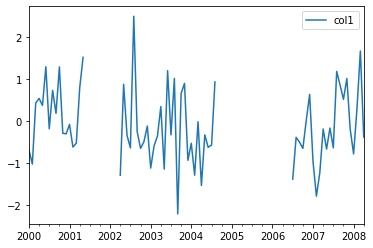

In [126]:
ts.plot()

In [127]:
ts2 = ts.loc[['2000-01-31', '2000-02-29', '2002-07-31', '2005-01-31', '2008-04-30'], :]

In [135]:
ts2[['2000-02-29', '2005-01-31']] = np.nan

In [142]:
ts2

,col1
2000-01-31,-0.690267
2000-02-29,NaN
2002-07-31,-0.640096
2005-01-31,NaN
2008-04-30,-0.381589


In [1]:
import numpy as np
import pandas as pd
import scipy

In [3]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 19, 20, 29])

<AxesSubplot:>

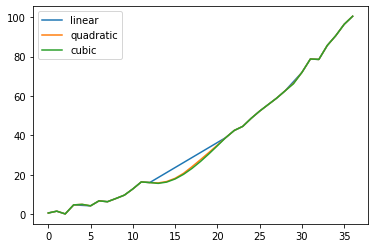

In [7]:
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

In [8]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))
interp_s = ser.reindex(new_index).interpolate(method='pchip')
interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

In [9]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])

In [10]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [3]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])
df = pd.DataFrame({'a': [0,1,2,3,4], 'b': [5,6,7,8,9]})

In [11]:
# ser.replace(0,5)
# ser.replace([0,1,2,3,4], [4,3,2,1,0])
# ser.replace({0: 10, 4:100})
ser.replace([0,3], method='bfill')

0    1.0
1    1.0
2    2.0
3    4.0
4    4.0
dtype: float64

In [7]:
df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [13]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [20]:
# df.replace('.', np.nan)
# df.replace(['a', '.'], ['b', np.nan])
# df.replace([r'\.', r'(a)'], ['dot', r'\1stuff'], regex=True)
# df.replace({'b': '.'}, {'b': np.nan}, regex=True)
# df.replace({'b': '.'}, np.nan, regex=True)
df.replace({'b': {'b': r""}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [22]:
df1 = df.copy()
df1.loc[3,'b'] = '..'

In [23]:
df1

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,..,d


In [27]:
# df1.replace({'b': r's*(\.)\s*'}, {'b': r'\1ty'}, regex=True)
# df1.replace({'b': r's*(\.)\s*'}, r'\1ty', regex=True)
df1.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


In [33]:
df = pd.DataFrame(np.random.randn(10,2))
df
# df[np.random.randn(df.shape[0]) > 0.5] = 1.5

,0,1
0,0.506318,-1.193029
1,1.340643,0.157571
2,1.699188,0.207562
3,-0.356828,0.998099
4,0.711465,0.124543
5,0.386188,-0.893965
6,2.449946,0.784959
7,1.417699,1.012879
8,0.629571,2.586156
9,-0.496676,0.224611


In [38]:
t = np.random.randn(df.shape[0])
t

array([-2.39849528, -0.39830116, -0.65609406, -0.64357652, -0.46818969,
        1.24953821,  0.24256265, -0.42308917, -0.3991899 , -0.45902994])

In [40]:
df[t >0.5] = 1.5
df

,0,1
0,0.506318,-1.193029
1,1.340643,0.157571
2,1.699188,0.207562
3,-0.356828,0.998099
4,0.711465,0.124543
5,1.500000,1.500000
6,2.449946,0.784959
7,1.417699,1.012879
8,0.629571,2.586156
9,-0.496676,0.224611


In [41]:
df.replace(1.5, np.nan)

,0,1
0,0.506318,-1.193029
1,1.340643,0.157571
2,1.699188,0.207562
3,-0.356828,0.998099
4,0.711465,0.124543
5,NaN,NaN
6,2.449946,0.784959
7,1.417699,1.012879
8,0.629571,2.586156
9,-0.496676,0.224611


In [42]:
df00 = df.iloc[0, 0]

In [43]:
df.replace([1.5, df00], [np.nan, 'a'])

,0,1
0,a,-1.193029
1,1.340643,0.157571
2,1.699188,0.207562
3,-0.356828,0.998099
4,0.711465,0.124543
5,NaN,NaN
6,2.449946,0.784959
7,1.417699,1.012879
8,0.629571,2.586156
9,-0.496676,0.224611


In [48]:
table = pd.read_html('https://pandas.pydata.org/docs/user_guide/missing_data.html')

In [51]:
print(table[1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>data type</th>
      <th>Cast to</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>integer</td>
      <td>float</td>
    </tr>
    <tr>
      <td>boolean</td>
      <td>object</td>
    </tr>
    <tr>
      <td>float</td>
      <td>no cast</td>
    </tr>
    <tr>
      <td>object</td>
      <td>no cast</td>
    </tr>
  </tbody>
</table>


In [53]:
df2 = pd.DataFrame({'A': [0,1,2]}, index=['a', 'a', 'b'])
df2

,A
a,0
a,1
b,2


In [54]:
df2.index.duplicated()

array([False,  True, False])

In [55]:
df2[~df2.index.duplicated()]

,A
a,0
b,2


In [59]:
# df2.index.drop_duplicates()
df2

,A
a,0
a,1
b,2


In [64]:
# df2.groupby(level=0).mean()
df2.groupby(level=0)

In [79]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
df.value.head()

0    26
1    75
2    60
3    57
4    88
Name: value, dtype: int32

In [68]:
labels = ['{0}-{1}'.format(i, i+9) for i in range(0, 100, 10)]
labels

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99']

In [83]:
list(range(0, 105, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [86]:
pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)

0     20-29
1     70-79
2     60-69
3     50-59
4     80-89
5     30-39
6     20-29
7     90-99
8     10-19
9     70-79
10    60-69
11    70-79
12    10-19
13    70-79
14    70-79
15    90-99
16    80-89
17    10-19
18    60-69
19    90-99
Name: value, dtype: category
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90-99']

In [90]:
# df['group'] = pd.cut(df.value, bins= range(0, 105, 10), right=False, labels=labels)
df['group2'] = pd.cut(df.value, bins= range(0, 105, 10), right=False)

In [91]:
df.head()

,value,group,group2
0,26,20-29,"[20, 30)"
1,75,70-79,"[70, 80)"
2,60,60-69,"[60, 70)"
3,57,50-59,"[50, 60)"
4,88,80-89,"[80, 90)"


In [100]:
from pandas.api.types import CategoricalDtype
s = pd.Series(['a', 'b', 'c', 'a'], dtype= pd.CategoricalDtype(categories=['b', 'c', 'd'], ordered=True))
s.dtype

CategoricalDtype(categories=['b', 'c', 'd'], ordered=True)

In [102]:
s1 = pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'd'], ordered=False)
s1

[NaN, 'b', 'c', NaN]
Categories (3, object): ['b', 'c', 'd']

In [104]:
s2 = pd.Series(s1)
s2

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b', 'c', 'd']

In [106]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')}, dtype=pd.CategoricalDtype(categories=list('abcd'), ordered=True))

In [107]:
df.dtypes

A    category
B    category
dtype: object

In [114]:
df.to_numpy().ravel()

array(['a', 'b', 'b', 'c', 'c', 'c', 'a', 'd'], dtype=object)

In [118]:
splitter = np.random.choice([0,1], 5, p=[0.5, 0.5])
splitter

array([0, 0, 0, 0, 1])

In [119]:
s = pd.Series(pd.Categorical.from_codes(splitter, categories=['train', 'test']))
s

0    train
1    train
2    train
3    train
4     test
dtype: category
Categories (2, object): ['train', 'test']

In [126]:
splitter = np.random.choice([0,1,2], 5, p=[0.5, 0.3, 0.2])
splitter

array([1, 0, 0, 1, 2])

In [127]:
s = pd.Series(pd.Categorical.from_codes(splitter, categories=['train', 'test', 'coach']))
s

0     test
1    train
2    train
3     test
4    coach
dtype: category
Categories (3, object): ['train', 'test', 'coach']

In [129]:
df.dtypes

A    category
B    category
dtype: object

In [153]:
df1 = pd.DataFrame({'A': ['a', 'b', 'c', 'd'], 'B': [1,2,3,4]})
df1.dtypes

A    object
B     int64
dtype: object

In [155]:
df1['A'] = df1['A'].astype(pd.CategoricalDtype())

In [157]:
df1.dtypes

A    category
B       int64
dtype: object

In [158]:
c1 = CategoricalDtype(['a', 'b', 'c']) # default ordered = False
c1 == CategoricalDtype(['b', 'c', 'a']) # True


True

In [159]:
c2 = CategoricalDtype(['a', 'b', 'c'], ordered=True)
c2 == CategoricalDtype(['b', 'a', 'c'], ordered=False) # False

False

In [160]:
c1 == 'category'

True

In [161]:
c2 =='category'

True

In [1]:
import numpy as np
import pandas as pd

In [3]:
s = pd.Series(['a', 'b', 'c', 'a'], dtype='category')
# s.cat.categories = ['Group %s' % g for g in s.cat.categories]

In [7]:
s = s.cat.rename_categories([1,2,3])
s.cat.rename_categories({1: 'x', 2: 'y', 3: 'z'})

0    x
1    y
2    z
3    x
dtype: category
Categories (3, object): ['x', 'y', 'z']

In [16]:
s = pd.Series(['a', 'b', 'c'], dtype='category')

In [17]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [23]:
# s.cat.categories = [1, 1, 1] 
# s.cat.categories = [1, 2, np.nan]
s.cat.categories = [1,2,3]

In [26]:
s.cat.rename_categories(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [32]:
# s.cat.rename_categories(['x', 'y', 'z'], inplace=True)
s.cat.add_categories([4])

0    x
1    y
2    z
dtype: category
Categories (4, object): ['x', 'y', 'z', 4]

In [37]:
s.cat.categories

Index(['x', 'y', 'z', 4], dtype='object')

In [40]:
s = s.cat.remove_categories(['x', 4])

In [42]:
s.cat.categories

Index(['y', 'z'], dtype='object')

In [43]:
s = pd.Series(pd.Categorical(['a', 'b', 'a'], categories=['a', 'b', 'c', 'd']))
s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [47]:
s = s.cat.remove_unused_categories()

In [48]:
s.cat.categories

Index(['a', 'b'], dtype='object')

In [49]:
s = pd.Series(['one', 'two', 'four', '-'], dtype='category')
s = s.cat.set_categories(['one', 'two', 'three', 'four'])
s.cat.categories

Index(['one', 'two', 'three', 'four'], dtype='object')

In [51]:
s = pd.Series(pd.Categorical(['a', 'b', 'c', 'a'], ordered=False))
s.sort_values()

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [52]:
from pandas.api.types import CategoricalDtype
s1 = pd.Series(['a', 'b', 'c', 'a'], dtype=CategoricalDtype(ordered=True))
s.sort_values()

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [56]:
s1.max()

'c'

In [58]:
s = s.cat.as_ordered()
s.min(), s.max()

('a', 'c')

In [62]:
s = pd.Series([1,2,3], dtype='category')
s.cat.categories

Int64Index([1, 2, 3], dtype='int64')

In [67]:
s = pd.Series([1,2,3,1], dtype='category')
s = s.cat.reorder_categories([2,3,1]).cat.as_ordered()

In [68]:
s.sort_values(inplace=True)

In [69]:
s

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [71]:
s.min(), s.max()

(2, 1)

In [77]:
dfs = pd.DataFrame({'A': pd.Categorical(list('bbeebbaa'), categories=['e', 'a', 'b'], ordered=True),
                    'B': [1,2,1,2,2,1,2,1]})
# dfs
dfs.sort_values(['A', 'B'])

,A,B
2,e,1
3,e,2
7,a,1
6,a,2
0,b,1
5,b,1
1,b,2
4,b,2


In [89]:
cat = pd.Series([1,2,3]).astype(CategoricalDtype([3,2,1], ordered=True))
cat_base = pd.Series([2,2,2]).astype(CategoricalDtype([3,2,1], ordered=True))
cat_base2 = pd.Series([2,2,2]).astype(CategoricalDtype(ordered=True))

In [90]:
cat > cat_base

0     True
1    False
2    False
dtype: bool

In [95]:
np.asarray(cat) == base

array([ True,  True,  True])

In [98]:
c1 = pd.Categorical(['a', 'b'], categories=['a', 'b'])
c2 = pd.Categorical(['a', 'b'], categories=['a', 'b'])
c1 == c2
# c1 > c2
# c1 < c2

array([ True,  True])

In [105]:
# columns = pd.Categorical(['One', 'One', 'Two'], categories=['One', 'Two', 'Three'], ordered=True)
# df = pd.DataFrame(data=[[1,2,3], [4,5,6]], columns=pd.MultiIndex.from_arrays([['A', 'B', 'B'], columns]))
df.groupby(level=1, axis=1).sum()

,One,Two,Three
0,3,3,0
1,9,6,0


In [104]:
df

A   B    
  One One Two
0   1   2   3
1   4   5   6

In [107]:
cats = pd.Categorical(['a', 'b', 'b', 'b', 'c', 'c', 'c'], categories=['a', 'b', 'c', 'd'])
df = pd.DataFrame({'cats': cats, 'values': [1,2,2,2,3,4,5]})
# df.groupby('cats').mean()
cats2 = pd.Categorical(['a', 'a', 'b', 'b'], categories=['a', 'b', 'c'])
df2 = pd.DataFrame({'cats': cats2, 'B': ['c', 'd', 'c', 'd'], 'values': [1,2,3,4]})

In [109]:
df2.groupby('cats').mean()

,values
cats,
a,1.5
b,3.5
c,NaN


In [113]:
df2

,cats,B,values
0,a,c,1
1,a,d,2
2,b,c,3
3,b,d,4


In [115]:
df2.pivot_table(index='cats', columns='B', values='values', aggfunc='sum')

B,c,d
cats,,
a,1,2
b,3,4
c,0,0


In [116]:
raw_cat = pd.Categorical(['a', 'a', 'b', 'b'], categories=['a', 'b', 'c'])
df = pd.DataFrame({'A': raw_cat, 'B': ['c', 'd', 'c', 'd'], 'values': [1,2,3,4]})
pd.pivot_table(df, index=['A', 'B'], values='values')

values
A B        
a c       1
  d       2
b c       3
  d       4

In [117]:
idx = pd.Index(['h', 'i', 'j', 'k', 'l', 'm', 'n'])
cats = pd.Series(['a', 'b', 'b', 'b', 'c', 'c', 'c'], index=idx, dtype='category')
values = [1,2,2,2,3,4,5]
df = pd.DataFrame({'cats': cats, 'values': values}, index=idx)
df.iloc[2:4, :]

,cats,values
j,b,2
k,b,2


In [122]:
df.iloc[2:4, :].dtypes
# df.loc['h': 'j', 'cats']
# df[df['cats'] == 'b']

cats      category
values       int64
dtype: object

In [123]:
df.loc['h', :]

cats      a
values    1
Name: h, dtype: object

In [126]:
df.loc[['h']]

,cats,values
h,a,1


In [128]:
df.loc[['h'], 'cats']

h    a
Name: cats, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [129]:
df.loc[['h']].dtypes

cats      category
values       int64
dtype: object

In [130]:
df.loc['h']

cats      a
values    1
Name: h, dtype: object

In [131]:
str_s = pd.Series(list('aabb'))
str_cat = str_s.astype('category')
str_cat.str.contains('a')

0     True
1     True
2    False
3    False
dtype: bool

In [132]:
date_s = pd.Series(pd.date_range('1/1/2015', periods=5))
date_cat = date_s.astype('category')
date_cat.dt.day

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [139]:
idx = pd.Index(['h', 'i', 'j', 'k', 'l', 'm', 'n'])
cats = pd.Categorical(['a'] * len(idx), categories=['a', 'b'])
values = [1] * len(idx)
df = pd.DataFrame({'cats': cats, 'values': values}, index=idx)
# df

In [138]:
df.iloc[2:4, :] = [['b', 2], ['b', 2]]
df

,cats,values
h,a,1
i,a,1
j,b,2
k,b,2
l,a,1
m,a,1
n,a,1


In [141]:
try:
    df.iloc[2:4, :] = [['c', 3], ['c', 3]]
except ValueError as e:
    print('ValueError: ', str(e))

ValueError:  Cannot setitem on a Categorical with a new category, set the categories first


In [142]:
from pandas.api.types import union_categoricals
s1 = pd.Series(['a', 'b'], dtype='category')
s2 = pd.Series(['a', 'b', 'a'], dtype='category')
pd.concat([s1, s2]) # category dtype

0    a
1    b
0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [143]:
s3 = pd.Series(['b', 'c'], dtype='category')
pd.concat([s1,s3]) # object

0    a
1    b
0    b
1    c
dtype: object

In [146]:
in_cats = pd.Series([1,2], dtype='category')
float_cats = pd.Series([3.0, 4.0], dtype='category')
# pd.concat([in_cats, float_cats]) # float64
# pd.concat([s1, s3]).astype('category')
union_categoricals([s1.array, s3.array])

['a', 'b', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

In [147]:
table = pd.read_html('https://pandas.pydata.org/docs/user_guide/categorical.html')

In [148]:
table[0]

,arg1,arg2,identical,result
0,category,category,True,category
1,category (object),category (object),False,object (dtype is inferred)
2,category (int),category (float),False,float (dtype is inferred)


In [150]:
print(table[0].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>arg1</th>
      <th>arg2</th>
      <th>identical</th>
      <th>result</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>category</td>
      <td>category</td>
      <td>True</td>
      <td>category</td>
    </tr>
    <tr>
      <td>category (object)</td>
      <td>category (object)</td>
      <td>False</td>
      <td>object (dtype is inferred)</td>
    </tr>
    <tr>
      <td>category (int)</td>
      <td>category (float)</td>
      <td>False</td>
      <td>float (dtype is inferred)</td>
    </tr>
  </tbody>
</table>


In [151]:
a = pd.Categorical(['a', 'b'], ordered=True)
b = pd.Categorical(['a', 'b', 'a'], ordered=True)
union_categoricals([a, b])

['a', 'b', 'a', 'b', 'a']
Categories (2, object): ['a' < 'b']

In [164]:
a1 = pd.Categorical(['c', 'b', 'a'], ordered=True)
b1 = pd.Categorical(['a', 'b', 'c'], ordered=True)
union_categoricals([a1, b1])
# union_categoricals([a1, b1], ignore_order=True)

['c', 'b', 'a', 'a', 'b', 'c']
Categories (3, object): ['a' < 'b' < 'c']

In [165]:
a = pd.Series(['b', 'c'], dtype='category')
b = pd.Series(['a', 'b'], dtype='category')
union_categoricals([a, b]) # categorical type

['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

In [166]:
import io
s = pd.Series(pd.Categorical(['a', 'b', 'b', 'a', 'a', 'd']))
s.cat.categories = ['very good', 'good', 'bad']
s = s.cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df = pd.DataFrame({'cats': s, 'vals': list(range(1,7))})
csv = io.StringIO()

In [167]:
df.to_csv(csv)

In [170]:
pd.read_csv(io.StringIO(csv.getvalue())).dtypes

Unnamed: 0     int64
cats          object
vals           int64
dtype: object

In [174]:
s = pd.Series(['a', 'b', np.nan], dtype='category')
# s.isna()
# s.fillna('a')
s.dropna()

0    a
1    b
dtype: category
Categories (2, object): ['a', 'b']

In [177]:
s = pd.Series(['foo', 'bar'] * 1000)
# s.nbytes # 16000
s.astype('category').nbytes

2016

In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.DataFrame({ "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                    "C": np.random.randn(8),
                    "D": np.random.randn(8)})

In [32]:
def get_lowel_letters(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else: return 'consonant'
# df.groupby(get_lowel_letters, axis=1).groups
# df.groupby('A').groups
df.groupby(get_lowel_letters,axis=1).groups['vowel']

Index(['A'], dtype='object')

In [3]:
# df2 = pd.DataFrame({'X': list('BBAA'), 'Y':list(range(1,5))})
df2.groupby('X').sum()

,Y
X,
A,7
B,3


In [5]:
df2.groupby('X', sort=False).sum()

,Y
X,
B,3
A,7


In [6]:
df3 = pd.DataFrame({'X': list('ABAB'), 'Y':[1,4,3,2]})
df3.groupby('X').get_group('A')

,X,Y
0,A,1
2,A,3


In [7]:
df3.groupby('X').get_group('B')

,X,Y
1,B,4
3,B,2


In [42]:
# arrays = [  ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
#         ["one", "two", "one", "two", "one", "two", "one", "two"]]
# index = pd.MultiIndex.from_arrays(arrays, names=['first', 'last'])
# s = pd.Series(np.random.randn(8), index=index)
# s.groupby(level=1).sum() # by last index column
# s.groupby(level=0).sum() # by first index column
# s.groupby(level='last').sum()
# s.groupby(level='first').sum()
# s.groupby(level=[0,1]).sum()
s.groupby(level=['first', 'last']).sum()

first  last
bar    one    -1.093414
       two     0.959311
baz    one    -0.261967
       two    -0.483806
foo    one    -1.946938
       two     0.404222
qux    one    -0.392549
       two    -0.014582
dtype: float64

In [45]:
arrays = [  ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"]]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
df = pd.DataFrame({'A': [1,1,1,1,2,2,3,3], 'B': np.arange(8)}, index=index)
# df.groupby([pd.Grouper(level=1), 'A']).sum()
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [73]:
df = pd.DataFrame({ "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                    "C": np.random.randn(8),
                    "D": np.random.randn(8)})
grouped = df.groupby('A')
# grouped
# grouped['C'].sum()
# grouped['D']

In [70]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  0.233595  1.146701
3  bar  three  0.221399  0.183681
5  bar    two -0.665916  1.931477
foo
     A      B         C         D
0  foo    one -2.548750 -1.099764
2  foo    two  0.136766 -1.428449
4  foo    two  0.896486 -1.959980
6  foo    one -0.828874 -2.420626
7  foo  three  0.723745  1.120413


In [74]:
grouped.get_group('bar')
# grouped.get_group('foo')
# df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.567940,0.249974
3,bar,three,-1.840727,-0.466492
5,bar,two,0.074895,-0.927881


In [79]:
for i, j in grouped_C:
    print(i)
    print(j)

bar
1    1.049793
3   -0.401978
5   -2.333477
Name: C, dtype: float64
foo
0   -0.864925
2    2.108012
4    0.216225
6   -0.139278
7   -1.299604
Name: C, dtype: float64


In [78]:
for i in grouped:
    print(i)

('bar',      A      B         C         D
1  bar    one  0.567940  0.249974
3  bar  three -1.840727 -0.466492
5  bar    two  0.074895 -0.927881)
('foo',      A      B         C         D
0  foo    one -0.285382  0.839480
2  foo    two -0.562378  0.924753
4  foo    two  1.137565 -0.456300
6  foo    one  2.002370  0.423708
7  foo  three  1.223982  1.646187)


In [83]:
df.groupby(['A', 'B']).get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,-0.285382,0.839480
6,foo,one,2.002370,0.423708


In [85]:
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [86]:
for i, j in grouped:
    print(i)
    print(j)

bar
     A      B         C         D
1  bar    one  0.567940  0.249974
3  bar  three -1.840727 -0.466492
5  bar    two  0.074895 -0.927881
foo
     A      B         C         D
0  foo    one -0.285382  0.839480
2  foo    two -0.562378  0.924753
4  foo    two  1.137565 -0.456300
6  foo    one  2.002370  0.423708
7  foo  three  1.223982  1.646187


In [89]:
# df.groupby('A', as_index=False).sum()
df.groupby('A').sum().reset_index()

,A,C,D
0,bar,-1.197891,-1.144399
1,foo,3.516157,3.377829


In [96]:
grouped = df.groupby(['A', 'B'])
grouped.size()
# grouped.sum()
# df.groupby('A').sum().size

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [99]:
grouped.describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.567940       NaN  0.567940  0.567940  0.567940  0.567940   
    three   1.0 -1.840727       NaN -1.840727 -1.840727 -1.840727 -1.840727   
    two     1.0  0.074895       NaN  0.074895  0.074895  0.074895  0.074895   
foo one     2.0  0.858494  1.617685 -0.285382  0.286556  0.858494  1.430432   
    three   1.0  1.223982       NaN  1.223982  1.223982  1.223982  1.223982   
    two     2.0  0.287594  1.202041 -0.562378 -0.137392  0.287594  0.712579   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.567940   1.0  0.249974       NaN  0.249974  0.249974  0.249974   
    three -1.840727   1.0 -0.466492       NaN -0.466492 -0.466492 -0.466492   
    two    0.074895   1.0 -0.927881       NaN -0.927881 -0.927881 -0.927881   
foo one    2.002370   2.0  0.631594  0.293995  0.423708  0.527651  0.631594   
    three  1.223982   1.0  1.646187       NaN  1.646187  1.646187  1.646187   
    two    1.137565   2.0  0.234227  0.976552 -0.456300 -0.111037  0.234227   

                               
                75%       max  
A   B                          
bar one    0.249974  0.249974  
    three -0.466492 -0.466492  
    two   -0.927881 -0.927881  
foo one    0.735537  0.839480  
    three  1.646187  1.646187  
    two    0.579490  0.924753

In [109]:
data = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]
df4 = pd.DataFrame(data, columns=['A', 'B'])
df4.value_counts()

A    B
bar  1    2
foo  2    2
     1    1
dtype: int64

In [111]:
df4.groupby(['A', 'B']).nunique()

Empty DataFrame
Columns: []
Index: [(bar, 1), (foo, 1), (foo, 2)]

In [113]:
# grouped.agg(['sum', 'min', 'std'])
grouped['C'].agg([np.sum, np.min, np.std])

sum      amin       std
A   B                                  
bar one    0.567940  0.567940       NaN
    three -1.840727 -1.840727       NaN
    two    0.074895  0.074895       NaN
foo one    1.716988 -0.285382  1.617685
    three  1.223982  1.223982       NaN
    two    0.575187 -0.562378  1.202041

In [116]:
# grouped['C'].agg(['sum', 'min', 'std']).rename({'sum': 'foo', 'mean': 'bar', 'std': 'baz'}, axis=1)
(grouped['C'].agg(['sum', 'min', 'std']).rename({'sum': 'foo', 'mean': 'bar', 'std': 'baz'}))

sum       min       std
A   B                                  
bar one    0.567940  0.567940       NaN
    three -1.840727 -1.840727       NaN
    two    0.074895  0.074895       NaN
foo one    1.716988 -0.285382  1.617685
    three  1.223982  1.223982       NaN
    two    0.575187 -0.562378  1.202041

In [119]:
grouped.agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])

C                     D           
          <lambda_0> <lambda_1> <lambda_0> <lambda_1>
A   B                                                
bar one     0.000000        0.0   0.000000        0.0
    three   0.000000        0.0   0.000000        0.0
    two     0.000000        0.0   0.000000        0.0
foo one     2.287752        0.0   0.415772        0.0
    three   0.000000        0.0   0.000000        0.0
    two     1.699943        0.0   1.381054        0.0

In [120]:
df

,A,B,C,D
0,foo,one,-0.285382,0.839480
1,bar,one,0.567940,0.249974
2,foo,two,-0.562378,0.924753
3,bar,three,-1.840727,-0.466492
4,foo,two,1.137565,-0.456300
5,bar,two,0.074895,-0.927881
6,foo,one,2.002370,0.423708
7,foo,three,1.223982,1.646187
